C:\Users\jschoer\AppData\Local\Temp\ipykernel_10928\2415617267.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="substrate", y="rate", hue="enzyme",


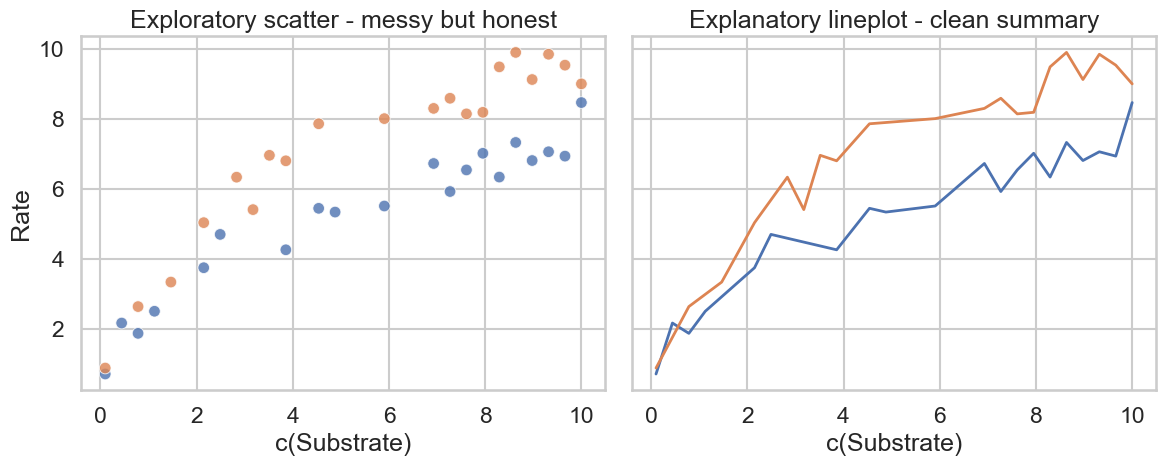

In [ ]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Generate synthetic enzyme kinetics data ---
np.random.seed(42)
substrate = np.linspace(0.1, 10, 30)
enzyme_types = ["Enzyme A", "Enzyme B"]

data = []
for enzyme in enzyme_types:
    Vmax = np.random.uniform(8, 12)
    Km = np.random.uniform(1.5, 3)
    rate = (Vmax * substrate) / (Km + substrate)
    noise = np.random.normal(0, 0.6, size=substrate.shape)
    rate_noisy = rate + noise
    # randomly drop some points
    rate_noisy[np.random.choice(range(20), size=10, replace=False)] = np.nan
    data.append(pd.DataFrame({
        "substrate": substrate,
        "rate": rate_noisy,
        "enzyme": enzyme
    }))

df = pd.concat(data, ignore_index=True)

# --- Plot setup ---
sns.set_theme(style="whitegrid", context="talk")

# --- (a) Exploratory scatter (messy) ---
figure, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.scatterplot(data=df, x="substrate", y="rate", hue="enzyme",
                ax=ax[0], s=70, alpha=0.8, legend=False)
ax[0].set_title("Exploratory scatter - messy but honest")
ax[0].set_xlabel("c(Substrate)")
ax[0].set_ylabel("Rate")
# ax[0].legend(title="")

# --- (b) Explanatory lineplot (polished) ---
sns.lineplot(data=df, x="substrate", y="rate", hue="enzyme",
             estimator="median", errorbar="sd", linewidth=2, ax=ax[1], legend=False)
ax[1].set_title("Explanatory lineplot - clean summary")
ax[1].set_xlabel("c(Substrate)")
ax[1].set_ylabel("Rate")
# ax[1].legend(title="")

# --- Styling ---
plt.tight_layout()
plt.show()


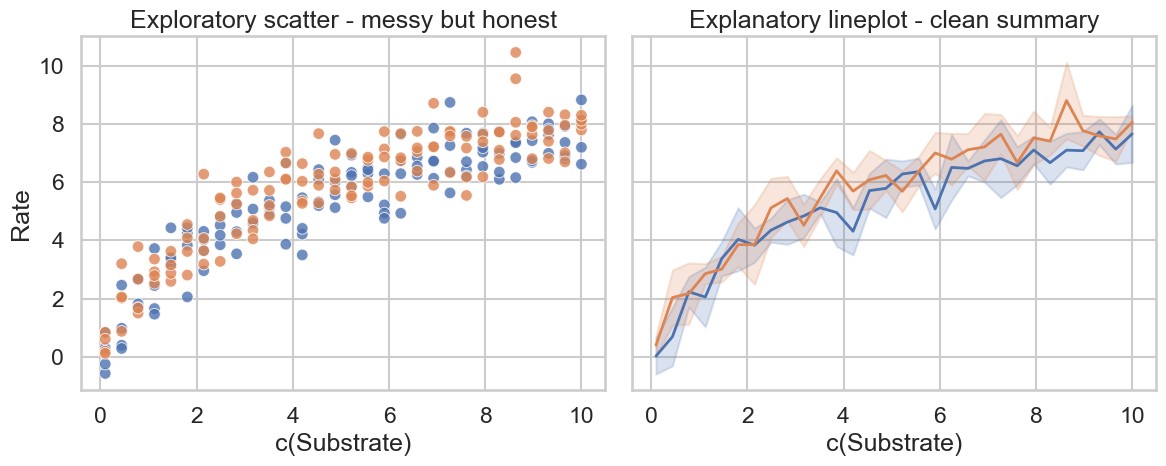

In [26]:
# regenerate data with replicates
np.random.seed(42)
substrate = np.linspace(0.1, 10, 30)
enzyme_types = ["Enzyme A", "Enzyme B"]
replicates = 4

data = []
for enzyme in enzyme_types:
    Vmax = np.random.uniform(8, 12)
    Km = np.random.uniform(1.5, 3)
    for r in range(replicates):
        rate = (Vmax * substrate) / (Km + substrate)
        noise = np.random.normal(0, 0.8, size=substrate.shape)
        rate_noisy = rate + noise
        data.append(pd.DataFrame({
            "substrate": substrate,
            "rate": rate_noisy,
            "enzyme": enzyme,
            "replicate": r + 1
        }))

df = pd.concat(data, ignore_index=True)

# --- (a) Exploratory scatter (messy) ---
figure, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.scatterplot(data=df, x="substrate", y="rate", hue="enzyme",
                ax=ax[0], s=70, alpha=0.8, legend=False)
ax[0].set_title("Exploratory scatter - messy but honest")
ax[0].set_xlabel("c(Substrate)")
ax[0].set_ylabel("Rate")
# ax[0].legend(title="")

# --- (b) Explanatory lineplot (polished) ---
sns.lineplot(data=df, x="substrate", y="rate", hue="enzyme",
             estimator="median", errorbar="sd", linewidth=2, ax=ax[1], legend=False)
ax[1].set_title("Explanatory lineplot - clean summary")
ax[1].set_xlabel("c(Substrate)")
ax[1].set_ylabel("Rate")
# ax[1].legend(title="")

# --- Styling ---
plt.tight_layout()
plt.show()
